In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [75]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import os

In [115]:
filename = "samples/starwars3.wav"
TMPFILE = "tmp.wav"
TMPFILE2 = "tmp2.wav"
x, SR = librosa.load(filename)
ipd.Audio(filename) # load a local WAV file

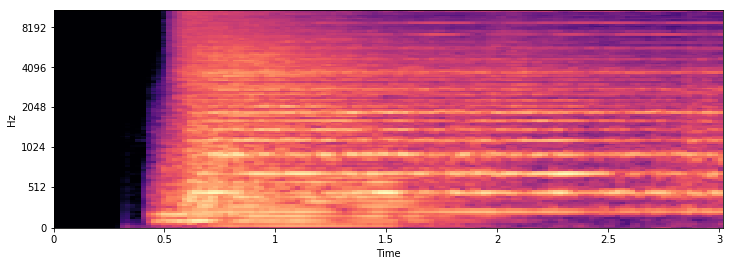

In [116]:
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)

log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')


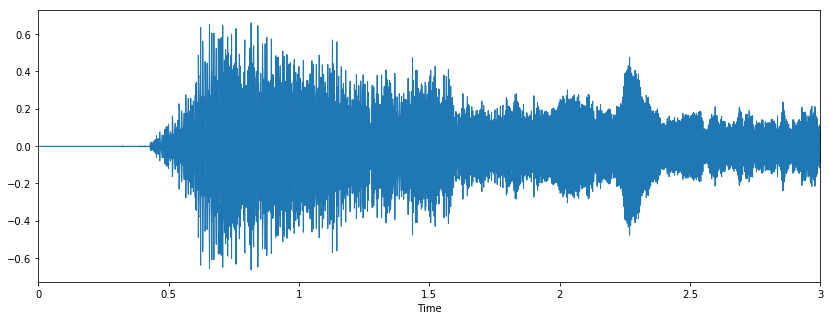

In [117]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

measurements = pd.read_csv('obj_pose-laser-radar-synthetic-input.txt', \
                           header=None, delim_whitespace = True, skiprows=1)
prv_time = 1477010443000000/1000000.0
x = np.array([
        [0.312242],
        [0.5803398],
        [0],
        [0]
        ])
ground_truth = np.zeros([4, 1])
rmse = np.zeros([4, 1])

#Initialize matrices P and A
P = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1000, 0],
        [0, 0, 0, 1000]
        ])
A = np.array([
        [1.0, 0, 1.0, 0],
        [0, 1.0, 0, 1.0],
        [0, 0, 1.0, 0],
        [0, 0, 0, 1.0]
        ])

H = np.array([
        [1.0, 0, 0, 0],
        [0, 1.0, 0, 0]
        ])
I = np.identity(4)
z_lidar = np.zeros([2, 1])

R = np.array([
        [0.0225, 0],
        [0, 0.0225]
        ])

noise_ax = 5
noise_ay = 5
Q = np.zeros([4, 4])

def predict():
    # Predict Step
    global x, P, Q
    x = np.matmul(A, x)
    At = np.transpose(A)
    P = np.add(np.matmul(A, np.matmul(P, At)), Q)

def update(z):
    global x, P    
    # Measurement update step
    Y = np.subtract(z_lidar, np.matmul(H, x))
    Ht = np.transpose(H)
    S = np.add(np.matmul(H, np.matmul(P, Ht)), R)
    K = np.matmul(P, Ht)
    Si = inv(S)
    K = np.matmul(K, Si)
    
    # New state
    x = np.add(x, np.matmul(K, Y))
    P = np.matmul(np.subtract(I ,np.matmul(K, H)), P)

def CalculateRMSE(estimations, ground_truth):
    rmse = np.zeros([4, 1])
    if (sys.getsizeof(estimations) != sys.getsizeof(ground_truth) or sys.getsizeof(estimations) == 0):
        print ('Invalid estimation or ground_truth data')
        return rmse
    rmse[0][0] =  np.sqrt(((estimations[0][0] - ground_truth[0][0]) ** 2).mean())
    rmse[1][0] =  np.sqrt(((estimations[1][0] - ground_truth[1][0]) ** 2).mean())
    rmse[2][0] =  np.sqrt(((estimations[2][0] - ground_truth[2][0]) ** 2).mean())
    rmse[3][0] =  np.sqrt(((estimations[3][0] - ground_truth[3][0]) ** 2).mean())
    print(rmse)
    return rmse

#**********************Iterate through main loop********************
#Begin iterating through sensor data
for i in range (len(measurements)):
    new_measurement = measurements.iloc[i, :].values
    if new_measurement[0] == 'L':
        #Calculate Timestamp and its power variables
        cur_time = new_measurement[3]/1000000.0
        dt = cur_time - prv_time
        prv_time = cur_time
        dt_2 = dt * dt
        dt_3 = dt_2 * dt
        dt_4 = dt_3 * dt
        #Updating matrix A with dt value
        A[0][2] = dt
        A[1][3] = dt
        #Updating Q matrix
        Q[0][0] = dt_4/4*noise_ax
        Q[0][2] = dt_3/2*noise_ax
        Q[1][1] = dt_4/4*noise_ay
        Q[1][3] = dt_3/2*noise_ay
        Q[2][0] = dt_3/2*noise_ax
        Q[2][2] = dt_2*noise_ax
        Q[3][1] = dt_3/2*noise_ay
        Q[3][3] = dt_2*noise_ay
        #Updating sensor readings
        z_lidar[0][0] = new_measurement[1]
        z_lidar[1][0] = new_measurement[2]
        #Collecting ground truths
        ground_truth[0] = new_measurement[4]
        ground_truth[1] = new_measurement[5]
        ground_truth[2] = new_measurement[6]
        ground_truth[3] = new_measurement[7]
        #Call Kalman Filter Predict and Update functions.
        predict()
        update(z_lidar)
        
    print('iteration', i, 'x: ', x)
    rmse = CalculateRMSE(x, ground_truth)

FileNotFoundError: File b'obj_pose-laser-radar-synthetic-input.txt' does not exist

In [6]:
#**************Importing Required Libraries*************
import numpy as np
import pandas as pd
from numpy.linalg import inv
import sys

#*************Declare Variables**************************
#Read Input File
measurements = pd.read_csv('obj_pose-laser-radar-synthetic-input.txt', header=None, delim_whitespace = True, skiprows=1)

# Manualy copy initial readings from first row of input file.
prv_time = 1477010443000000/1000000.0
x = np.array([
        [0.312242],
        [0.5803398],
        [0],
        [0]
        ])

#Initialize variables to store ground truth and RMSE values
ground_truth = np.zeros([4, 1])
rmse = np.zeros([4, 1])

#Initialize matrices P and A
P = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1000, 0],
        [0, 0, 0, 1000]
        ])
A = np.array([
        [1.0, 0, 1.0, 0],
        [0, 1.0, 0, 1.0],
        [0, 0, 1.0, 0],
        [0, 0, 0, 1.0]
        ])
H = np.array([
        [1.0, 0, 0, 0],
        [0, 1.0, 0, 0]
        ])
I = np.identity(4)
z_lidar = np.zeros([2, 1])
R = np.array([
        [0.0225, 0],
        [0, 0.0225]
        ])
noise_ax = 5
noise_ay = 5
Q = np.zeros([4, 4])

#**********************Define Functions*****************************
def predict():
    # Predict Step
    global x, P, Q
    x = np.matmul(A, x)
    At = np.transpose(A)
    P = np.add(np.matmul(A, np.matmul(P, At)), Q)

def update(z):
    global x, P    
    # Measurement update step
    Y = np.subtract(z_lidar, np.matmul(H, x))
    Ht = np.transpose(H)
    S = np.add(np.matmul(H, np.matmul(P, Ht)), R)
    K = np.matmul(P, Ht)
    Si = inv(S)
    K = np.matmul(K, Si)
    
    # New state
    x = np.add(x, np.matmul(K, Y))
    P = np.matmul(np.subtract(I ,np.matmul(K, H)), P)

def CalculateRMSE(estimations, ground_truth):
    rmse = np.zeros([4, 1])
    if (sys.getsizeof(estimations) != sys.getsizeof(ground_truth) or sys.getsizeof(estimations) == 0):
        print ('Invalid estimation or ground_truth data')
        return rmse
    rmse[0][0] =  np.sqrt(((estimations[0][0] - ground_truth[0][0]) ** 2).mean())
    rmse[1][0] =  np.sqrt(((estimations[1][0] - ground_truth[1][0]) ** 2).mean())
    rmse[2][0] =  np.sqrt(((estimations[2][0] - ground_truth[2][0]) ** 2).mean())
    rmse[3][0] =  np.sqrt(((estimations[3][0] - ground_truth[3][0]) ** 2).mean())
    print(rmse)
    return rmse

#**********************Iterate through main loop********************
#Begin iterating through sensor data
for i in range (len(measurements)):
    new_measurement = measurements.iloc[i, :].values
    if new_measurement[0] == 'L':
        #Calculate Timestamp and its power variables
        cur_time = new_measurement[3]/1000000.0
        dt = cur_time - prv_time
        prv_time = cur_time
        dt_2 = dt * dt
        dt_3 = dt_2 * dt
        dt_4 = dt_3 * dt
        #Updating matrix A with dt value
        A[0][2] = dt
        A[1][3] = dt
        #Updating Q matrix
        Q[0][0] = dt_4/4*noise_ax
        Q[0][2] = dt_3/2*noise_ax
        Q[1][1] = dt_4/4*noise_ay
        Q[1][3] = dt_3/2*noise_ay
        Q[2][0] = dt_3/2*noise_ax
        Q[2][2] = dt_2*noise_ax
        Q[3][1] = dt_3/2*noise_ay
        Q[3][3] = dt_2*noise_ay
        #Updating sensor readings
        z_lidar[0][0] = new_measurement[1]
        z_lidar[1][0] = new_measurement[2]
        #Collecting ground truths
        ground_truth[0] = new_measurement[4]
        ground_truth[1] = new_measurement[5]
        ground_truth[2] = new_measurement[6]
        ground_truth[3] = new_measurement[7]
        #Call Kalman Filter Predict and Update functions.
        predict()
        update(z_lidar)
        
    print('iteration', i, 'x: ', x)
    rmse = CalculateRMSE(x, ground_truth)

iteration 0 x:  [[0.312242 ]
 [0.5803398]
 [0.       ]
 [0.       ]]
[[0.312242 ]
 [0.5803398]
 [0.       ]
 [0.       ]]
iteration 1 x:  [[ 1.17208924]
 [ 0.48127553]
 [ 7.81690577]
 [-0.90059726]]
[[0.05210524]
 [0.11894907]
 [2.61747677]
 [0.90598722]]
iteration 2 x:  [[ 1.17208924]
 [ 0.48127553]
 [ 7.81690577]
 [-0.90059726]]
[[0.05210524]
 [0.11894907]
 [2.61747677]
 [0.90598722]]
iteration 3 x:  [[1.65735476]
 [0.61950825]
 [4.98047105]
 [1.2838825 ]]
[[0.01745076]
 [0.01816095]
 [0.21792095]
 [1.2659228 ]]
iteration 4 x:  [[1.65735476]
 [0.61950825]
 [4.98047105]
 [1.2838825 ]]
[[0.01745076]
 [0.01816095]
 [0.21792095]
 [1.2659228 ]]
iteration 5 x:  [[2.18293094]
 [0.66622255]
 [5.1433338 ]
 [0.80070634]]
[[0.02322694]
 [0.06213705]
 [0.0534422 ]
 [0.7630131 ]]
iteration 6 x:  [[2.18293094]
 [0.66622255]
 [5.1433338 ]
 [0.80070634]]
[[0.02322694]
 [0.06213705]
 [0.0534422 ]
 [0.7630131 ]]
iteration 7 x:  [[2.66800053]
 [0.69034497]
 [5.01705694]
 [0.55928847]]
[[0.01132247]
 [0

 [-0.13885346]]
[[0.1233066 ]
 [0.05863729]
 [0.2793881 ]
 [0.76112354]]
iteration 169 x:  [[ 8.88770461]
 [20.92845926]
 [-4.90862057]
 [-0.34704022]]
[[0.01578461]
 [0.06907926]
 [0.11981057]
 [0.77900778]]
iteration 170 x:  [[ 8.88770461]
 [20.92845926]
 [-4.90862057]
 [-0.34704022]]
[[0.01578461]
 [0.06907926]
 [0.11981057]
 [0.77900778]]
iteration 171 x:  [[ 8.32376955]
 [20.72169919]
 [-5.10628685]
 [-0.81245786]]
[[0.07180245]
 [0.01405081]
 [0.36520785]
 [0.53454814]]
iteration 172 x:  [[ 8.32376955]
 [20.72169919]
 [-5.10628685]
 [-0.81245786]]
[[0.07180245]
 [0.01405081]
 [0.36520785]
 [0.53454814]]
iteration 173 x:  [[ 7.84371999]
 [20.56050119]
 [-5.02356728]
 [-1.02873104]]
[[0.08072501]
 [0.02980881]
 [0.33904128]
 [0.53363796]]
iteration 174 x:  [[ 7.84371999]
 [20.56050119]
 [-5.02356728]
 [-1.02873104]]
[[0.08072501]
 [0.02980881]
 [0.33904128]
 [0.53363796]]
iteration 175 x:  [[ 7.27374956]
 [20.4300706 ]
 [-5.20646596]
 [-1.10327525]]
[[0.18563844]
 [0.0064206 ]
 [0.

iteration 321 x:  [[-13.40344452]
 [ -8.75185572]
 [ -4.25690612]
 [ -2.06720283]]
[[0.20577548]
 [0.07433228]
 [0.32306288]
 [0.19505983]]
iteration 322 x:  [[-13.40344452]
 [ -8.75185572]
 [ -4.25690612]
 [ -2.06720283]]
[[0.20577548]
 [0.07433228]
 [0.32306288]
 [0.19505983]]
iteration 323 x:  [[-13.89914373]
 [ -8.97287461]
 [ -4.44628014]
 [ -2.10588027]]
[[0.17179627]
 [0.03036139]
 [0.20232986]
 [0.43968527]]
iteration 324 x:  [[-13.89914373]
 [ -8.97287461]
 [ -4.44628014]
 [ -2.10588027]]
[[0.17179627]
 [0.03036139]
 [0.20232986]
 [0.43968527]]
iteration 325 x:  [[-14.37881793]
 [ -9.18515773]
 [ -4.54108242]
 [ -2.1104661 ]]
[[0.16031207]
 [0.02579373]
 [0.16827758]
 [0.6564421 ]]
iteration 326 x:  [[-14.37881793]
 [ -9.18515773]
 [ -4.54108242]
 [ -2.1104661 ]]
[[0.16031207]
 [0.02579373]
 [0.16827758]
 [0.6564421 ]]
iteration 327 x:  [[-14.92909906]
 [ -9.24834129]
 [ -4.80123165]
 [ -1.71049062]]
[[0.08388094]
 [0.04562671]
 [0.03962465]
 [0.47445562]]
iteration 328 x:  [[

iteration 483 x:  [[-10.79057329]
 [ 10.91227312]
 [  5.32885267]
 [  0.2792136 ]]
[[0.08468671]
 [0.06141312]
 [0.14732767]
 [0.0648965 ]]
iteration 484 x:  [[-10.79057329]
 [ 10.91227312]
 [  5.32885267]
 [  0.2792136 ]]
[[0.08468671]
 [0.06141312]
 [0.14732767]
 [0.0648965 ]]
iteration 485 x:  [[-10.323401  ]
 [ 10.91268042]
 [  5.15109816]
 [  0.20478718]]
[[0.033509  ]
 [0.04301042]
 [0.03576784]
 [0.04201088]]
iteration 486 x:  [[-10.323401  ]
 [ 10.91268042]
 [  5.15109816]
 [  0.20478718]]
[[0.033509  ]
 [0.04301042]
 [0.03576784]
 [0.04201088]]
iteration 487 x:  [[-9.81926995]
 [11.00454259]
 [ 5.12139824]
 [ 0.39788181]]
[[0.01881505]
 [0.12087259]
 [0.06966176]
 [0.27966941]]
iteration 488 x:  [[-9.81926995]
 [11.00454259]
 [ 5.12139824]
 [ 0.39788181]]
[[0.01881505]
 [0.12087259]
 [0.06966176]
 [0.27966941]]
iteration 489 x:  [[-9.30690871]
 [11.04031316]
 [ 5.12199849]
 [ 0.38701414]]
[[0.01196529]
 [0.14674316]
 [0.07228051]
 [0.30632765]]
iteration 490 x:  [[-9.30690871]

In [145]:
os.remove(TMPFILE)
print(TMPFILE)
librosa.output.write_wav(TMPFILE, z, SR)

tmp.wav


In [143]:
print(TMPFILE2)
librosa.output.write_wav(TMPFILE2, xhat, SR)

tmp2.wav


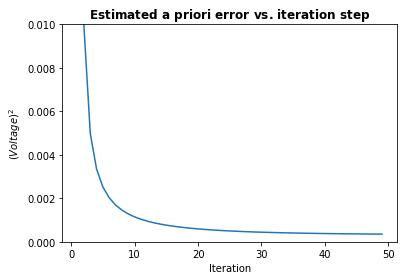

In [55]:
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()